# Experimental Design Report
## Background 
How big is the performance gap between men and women in endurance running events? What happens to that gap as the event distance goes up, and should women be directly competing against men in longer events rather than in their own category? To try and answer these questions, I’ll be looking at datasets from two events. The Boston Marathon (26.2 miles) and the Ultra-Trail du Mont-Blanc (UTMB, ~105 miles).

Original source for Boston marathon data:
https://www.kaggle.com/rojour/boston-results   
Original source for UTBM data: https://www.kaggle.com/ceruleansea/ultratrail-du-montblanc-20032017

In [1]:
# Set up envirionment 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

Each year of results is stored in a separate file so we will need to combine them into a single DataFrame for easier analysis. There links above contain 3 years of results from the boston marathon and 15 years of results for the UTMB. 

In [2]:
# Function to loop through all the years and add the results to a single data frame

def combine_data(years, file_path):
    df_ouput = pd.DataFrame()
    for year in years:
        if any(df_ouput) == False:
            df_ouput = pd.read_csv(file_path + str(year) + '.csv')
            df_ouput['year'] = year
        else:
            df = pd.read_csv(file_path + str(year) + '.csv')
            df['year'] = year
            df_ouput = df_ouput.append(df)
    return df_ouput



In [3]:
ba_years = [2017, 2016, 2015]
ba_file_path = 'boston_data/marathon_results_'
ba_df = combine_data(ba_years, ba_file_path)

utmb_years = [2017, 2016, 2015, 2014, 2013, 2011]
utmb_file_path = 'utmb_data/utmb_'
utmb_df = combine_data(utmb_years, utmb_file_path)

In [4]:
ba_df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,year,Unnamed: 8
0,0.0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1,2017,NaN
1,1.0,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2,2017,NaN
2,2.0,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3,2017,NaN
3,3.0,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4,2017,NaN
4,4.0,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5,2017,NaN


In [5]:
utmb_df.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Delevret,...,Giète,Bovine,Arrivé,Delevre,st Ger,M Favre,Ferret,Martign,Argent,Cham
0,0,4,D'HAENE François,Salomon,SE H,1,FR,19:01:54,00:00:00,01:11:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,JORNET BURGADA Kilian,Salomon,SE H,2,ES,19:16:59,00:15:05,01:10:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,14,TOLLEFSON Tim,Hoka,SE H,3,US,19:53:00,00:51:06,01:15:24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7,THEVENARD Xavier,Asics,SE H,4,FR,20:03:39,01:01:45,01:11:51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,WALMSLEY Jim,Hoka,SE H,5,US,20:11:38,01:09:44,01:09:59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ba_men_count = len(ba_df.loc[ba_df['M/F'] == 'M'])
ba_women_count = len(ba_df.loc[ba_df['M/F'] == 'F'])
ba_total_count = ba_men_count + ba_women_count

print(f"Total male Boston marathon participation: {ba_men_count/ba_total_count}")
print(f"Total female Boston marathon: {ba_women_count/ba_total_count}")

utmb_men_count = len(utmb_df.loc[utmb_df.category.str.contains('H')])
utmb_women_count = len(utmb_df.loc[utmb_df.category.str.contains('F')])
utmb_total_count = utmb_men_count + utmb_women_count

print(f"Total male UTMB participation: {utmb_men_count/utmb_total_count}")
print(f"Total female UTMB participation: {utmb_women_count/utmb_total_count}")

Total male Boston marathon participation: 0.5459956302267761
Total female Boston marathon: 0.45400436977322384
Total male UTMB participation: 0.9109070188375679
Total female UTMB participation: 0.08909298116243212


Based on the above analysis, male vs female participation for the marathon distance is fairly balanced at 55% to 45% but the UTMB shows much lower participation with women making up less than 9%. 

In [7]:
# Inspect the format of the time data
utmb_time = utmb_df.loc[utmb_df.time != ' '].time
utmb_time.head()
print(type(utmb_time.values[0]))
utmb_time.head()

<class 'str'>


0    19:01:54
1    19:16:59
2    19:53:00
3    20:03:39
4    20:11:38
Name: time, dtype: object

The datasets contain total times, stored in the Official Time field for the Boston Marathon dataset and in the time field for the UTMB dataset. Times are stored as strings in HH:MM:SS format, so they will need to be converted to a numeric format for analysis.

In [8]:
# test converting time string to a value in hours
timedelta = pd.to_timedelta(utmb_time)
time_hours = timedelta/pd.Timedelta('1 hour')
time_hours

0       19.031667
1       19.283056
2       19.883333
3       20.060833
4       20.193889
          ...    
1128    45.553889
1129    45.553889
1130    45.689722
1131    45.736667
1132    45.760556
Name: time, Length: 9187, dtype: float64

In [9]:
# Create a function to convert the time in strign format to hours
def str_to_hours(data):
    timedelta = pd.to_timedelta(data)
    time_hours = timedelta/pd.Timedelta('1 hour')
    return time_hours

In [10]:
# Add column for time in hours
utmb_df['time_hours'] = str_to_hours(utmb_df['time'])

ba_df['time_hours'] = str_to_hours(ba_df['Official Time'])

In [11]:
utmb_df.head()

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Delevret,...,Bovine,Arrivé,Delevre,st Ger,M Favre,Ferret,Martign,Argent,Cham,time_hours
0,0,4,D'HAENE François,Salomon,SE H,1,FR,19:01:54,00:00:00,01:11:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.031667
1,1,2,JORNET BURGADA Kilian,Salomon,SE H,2,ES,19:16:59,00:15:05,01:10:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.283056
2,2,14,TOLLEFSON Tim,Hoka,SE H,3,US,19:53:00,00:51:06,01:15:24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.883333
3,3,7,THEVENARD Xavier,Asics,SE H,4,FR,20:03:39,01:01:45,01:11:51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.060833
4,4,1,WALMSLEY Jim,Hoka,SE H,5,US,20:11:38,01:09:44,01:09:59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.193889


In [12]:
# Parse out men and women category column
utmb_df['M/F'] = utmb_df.category.str.contains('H').map({True:'M',False:'F'})

In [13]:
utmb_df.loc[utmb_df.time == ' ']

,Unnamed: 0,bib,name,team,category,rank,nationality,time,timediff,Delevret,...,Arrivé,Delevre,st Ger,M Favre,Ferret,Martign,Argent,Cham,time_hours,M/F
1687,1687,2110,DENONCIN Thierry,,V2 H,1688,,,,01:57:20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,M
1688,1688,2721,FUNG Sze Ming,,V1 H,1689,,,,01:50:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,M
1689,1689,105,MENDIZABAL Adur,,SE H,1690,,,,01:33:37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,M
1690,1690,616,THEODIN Yann,,V1 H,1691,,,,01:31:18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,M
1691,1691,1568,CHAVEZ Anthony,,V1 H,1692,,,,01:42:33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2363,2093,BRETON Laurent,,V2 H,2361,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,M
2364,2364,2867,SCHMIED Josef,,V2 H,2361,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,M
2365,2365,3114,GASSET Olga,,V1 F,2361,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,F
2366,2366,3122,HERTEL Sebastian,,SE H,2361,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,M


There are some results don't have finish times. These are not usefull so we will drop them from the DataFrame

In [14]:
utmb_df_drop_dnf = utmb_df.loc[utmb_df.time != ' ']

In [15]:
# Split the data into two sets, men and women 
utmb_men = utmb_df_drop_dnf.loc[utmb_df_drop_dnf['M/F'] == 'M']
utmb_women = utmb_df_drop_dnf.loc[utmb_df_drop_dnf['M/F'] == 'F']

ba_men = ba_df.loc[ba_df['M/F'] == 'M']
ba_women = ba_df.loc[ba_df['M/F'] == 'F']

## Boston marathon analysis

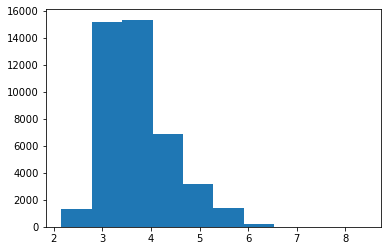

DescribeResult(nobs=43482, minmax=(2.1547222222222224, 8.419166666666667), mean=3.729697684610235, variance=0.48931754206268846, skewness=0.9809260265067807, kurtosis=0.9162919467823727)


In [16]:
# Check the distribution of the data 
plt.hist(ba_men.time_hours)
plt.show()
print(stats.describe(ba_men.time_hours))

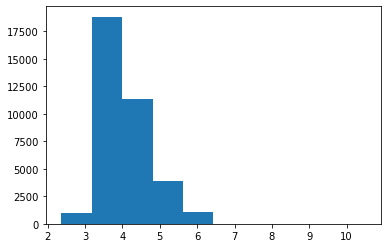

NormaltestResult(statistic=4974.4083251629345, pvalue=0.0)


DescribeResult(nobs=36156, minmax=(2.3644444444444446, 10.506388888888889), mean=4.074173996017258, variance=0.40242176982937844, skewness=0.9882176000390608, kurtosis=1.0732261595163308)

In [17]:
plt.hist(ba_women.time_hours)
plt.show()
print(stats.normaltest(ba_women.time_hours))
stats.describe(ba_women.time_hours)

The distribution of the data show a fair amount of skewness and kurtosis but it should still be possible to use a t-test. 

Stated formally the hypothesis is 

Null hypothesis: On average, the time it takes for male and female participants to complete the event is the same.   
Alternate hypothesis: there is a significant difference in the average time it takes male and female participants to complete the event.  

Based on the summary statistics I expect to see a significant difference here.

In [18]:
stats.ttest_ind(ba_women.time_hours, ba_men.time_hours)

Ttest_indResult(statistic=72.16095428443812, pvalue=0.0)

The results if the t-test show a do show a significant differnece in the finish times between men and woment for the boston marathon data

0.3444763114070053


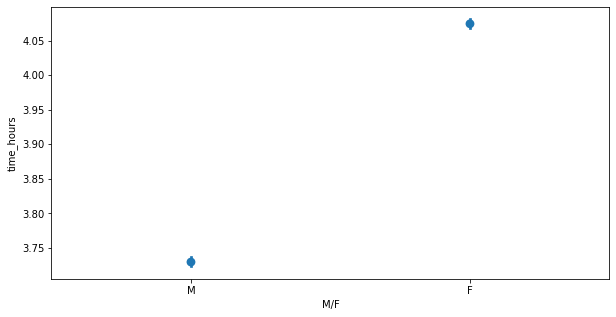

In [19]:
plt.figure(figsize=[10,5])
sns.pointplot(x='M/F', y='time_hours', data=ba_df, join=False)
print(ba_women.time_hours.mean() - ba_men.time_hours.mean())

Based on the above point plot, the men are about 1/3 of an hour faster than the women at the marathon distance.

## UTMB analysis

DescribeResult(nobs=8451, minmax=(19.031666666666666, 47.143055555555556), mean=39.728538897434895, variance=26.959901397160557, skewness=-1.0818087694536964, kurtosis=0.7516660149194432)
NormaltestResult(statistic=1234.9992759381144, pvalue=6.657553311044291e-269)


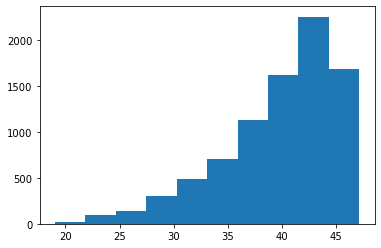

In [20]:
# Plot the distribution of the men's group
plt.hist(utmb_men.time_hours)
print(stats.describe((utmb_men.time_hours)))
print(stats.normaltest(utmb_men.time_hours))
plt.show()

DescribeResult(nobs=736, minmax=(22.62388888888889, 46.71111111111111), mean=40.482157306763284, variance=28.2602051024402, skewness=-1.1545151486223302, kurtosis=0.5054481398984412)
NormaltestResult(statistic=116.40592761601597, pvalue=5.281703138615134e-26)


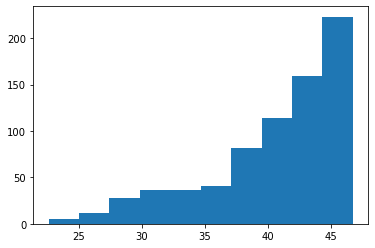

In [21]:
plt.hist(utmb_women.time_hours)
print(stats.describe(utmb_women.time_hours))
print(stats.normaltest(utmb_women.time_hours))
plt.show()

Based on the distributions in the histogram above it looks like the UTMB data is not normally distributed.  
I will test the same hypothisis as before but this time I will use the Mann-Whitney U-test

In [22]:
stats.mannwhitneyu(utmb_women.time_hours, utmb_men.time_hours)

MannwhitneyuResult(statistic=2733954.5, pvalue=2.5374778854792003e-08)

The test results still show a that there is also a significant differance in the medians between men and women at the longer distance. Lets look at the point plot to see how it compares to the Boston marathon results.

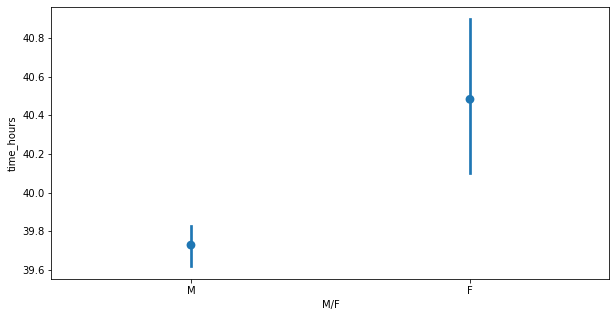

In [23]:
plt.figure(figsize=[10,5])
sns.pointplot(x='M/F', y='time_hours', data=utmb_df_drop_dnf, join=False)

From the point plot it looks like a difference of about 1 hour between the two groups. The UTMB is 4 times the distance of the boston marathon but difference in finish times is only went up by about 3x. It appears the gap is getting closer at the longer distance.

For next steps, there are events that are longer than 100 miles. I would be interested in seeing if for events in the 200+ mile distance the gap contiues to close.